In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


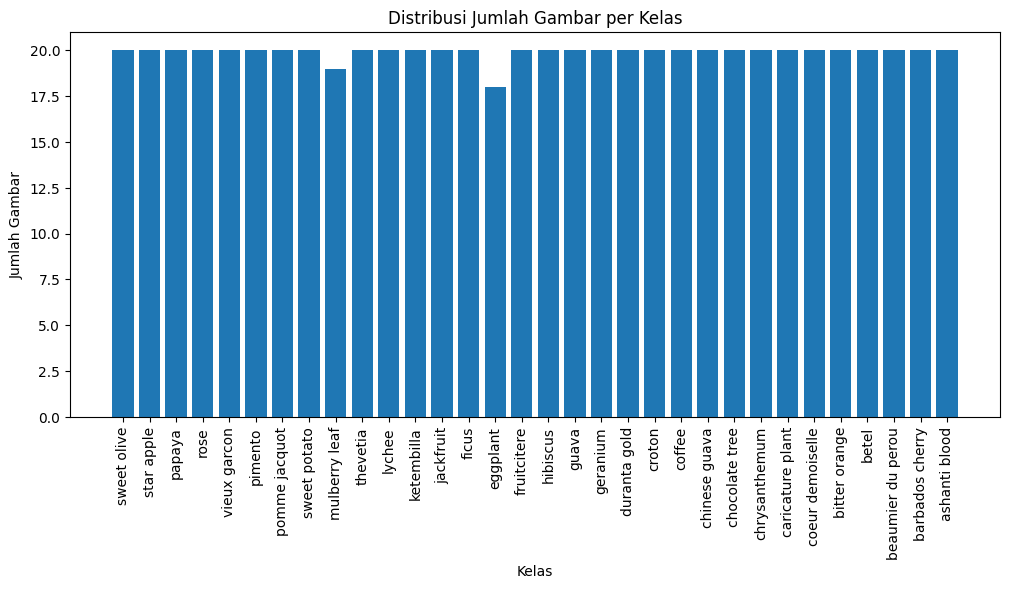

Jumlah kelas: 32


In [7]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/dataset/Folio"

classes = os.listdir(data_dir)
num_classes = len(classes)

image_count = {
    cls: len(os.listdir(os.path.join(data_dir, cls)))
    for cls in classes
}

plt.figure(figsize=(12,5))
plt.bar(image_count.keys(), image_count.values())
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.show()

print("Jumlah kelas:", num_classes)


In [9]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)


Found 637 files belonging to 32 classes.
Using 510 files for training.
Found 637 files belonging to 32 classes.
Using 127 files for validation.


In [10]:
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

baseline_model.fit(train_ds, validation_data=val_ds, epochs=5)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.0246 - loss: 56.1509 - val_accuracy: 0.0157 - val_loss: 3.4663
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.0112 - loss: 3.4659 - val_accuracy: 0.0157 - val_loss: 3.4671
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.0322 - loss: 3.4660 - val_accuracy: 0.0157 - val_loss: 3.4675
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.0296 - loss: 3.4659 - val_accuracy: 0.0236 - val_loss: 3.4683
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.0236 - loss: 3.4650 - val_accuracy: 0.0157 - val_loss: 3.4690


In [11]:
baseline_model.save("baseline_model.h5")

from google.colab import files
files.download("baseline_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
advanced_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

advanced_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

advanced_model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.0279 - loss: 6.8911 - val_accuracy: 0.0236 - val_loss: 3.4664
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.1082 - loss: 3.3512 - val_accuracy: 0.2047 - val_loss: 3.0744
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.4286 - loss: 2.3927 - val_accuracy: 0.4094 - val_loss: 2.1199
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 5s/step - accuracy: 0.6767 - loss: 1.1683 - val_accuracy: 0.6063 - val_loss: 1.4380
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.8453 - loss: 0.6414 - val_accuracy: 0.6614 - val_loss: 1.4381
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.9236 - loss: 0.2726 - val_accuracy: 0.6535 - val_loss: 1.4080
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 96s 6s/step - accuracy: 0.9684 - loss: 0.1072 - val_accuracy: 0.6299 - val_loss: 1.5750
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.9566 - loss: 0.1636 - val_accuracy: 0.6535 - val_los

In [13]:
advanced_model.save("advanced_cnn_model.h5")
files.download("advanced_cnn_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

deep_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

deep_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

deep_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.2380 - loss: 3.1797 - val_accuracy: 0.7008 - val_loss: 1.5958
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.8501 - loss: 1.0273 - val_accuracy: 0.9370 - val_loss: 0.5863
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9629 - loss: 0.3237 - val_accuracy: 0.9606 - val_loss: 0.2971
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.9909 - loss: 0.1346 - val_accuracy: 0.9685 - val_loss: 0.2066
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.9952 - loss: 0.0704 - val_accuracy: 0.9921 - val_loss: 0.1413
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9975 - loss: 0.0453 - val_accuracy: 0.9685 - val_loss: 0.1325
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 1.0000 - loss: 0.0335 - val_accuracy: 0.9764 - val_loss: 0.1275
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 1.0000 - loss: 0.0271 - val_accuracy: 0.9921 - val_loss:

In [16]:
deep_model.save("mobilenet_folio_model.h5")
files.download("mobilenet_folio_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
loss, accuracy = deep_model.evaluate(val_ds)
print(f"Akurasi Validasi: {accuracy:.2%}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9656 - loss: 0.0919
Akurasi Validasi: 97.64%


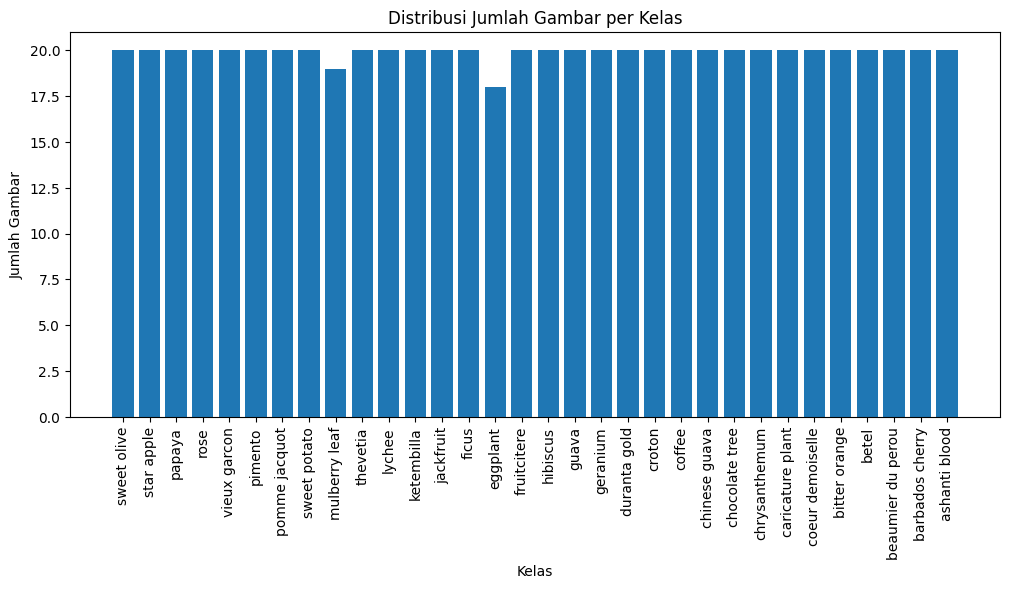

In [19]:
#@title 4.4 Exploratory Data Analysis (EDA) – Visualisasi 1: Distribusi Jumlah Gambar per Kelas

import os
import matplotlib.pyplot as plt

data_dir = "/content/drive/MyDrive/dataset/Folio"

class_counts = {
    cls: len(os.listdir(os.path.join(data_dir, cls)))
    for cls in os.listdir(data_dir)
}

plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Gambar per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Gambar")
plt.show()



Found 637 files belonging to 32 classes.


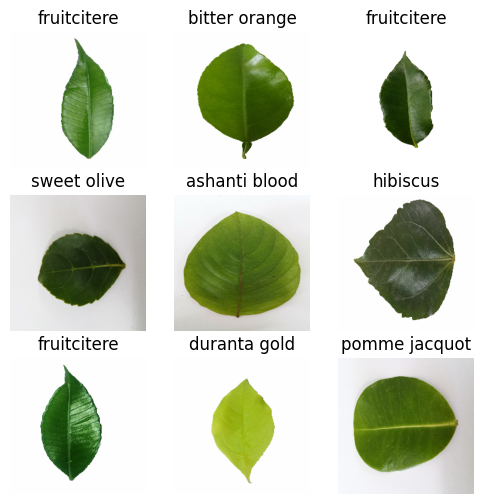

In [20]:
#@title Visualisasi 2: Contoh Sampel Gambar dari Beberapa Kelas


import tensorflow as tf

sample_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224,224),
    batch_size=9
)

plt.figure(figsize=(6,6))
for images, labels in sample_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(sample_ds.class_names[labels[i]])
        plt.axis("off")
plt.show()


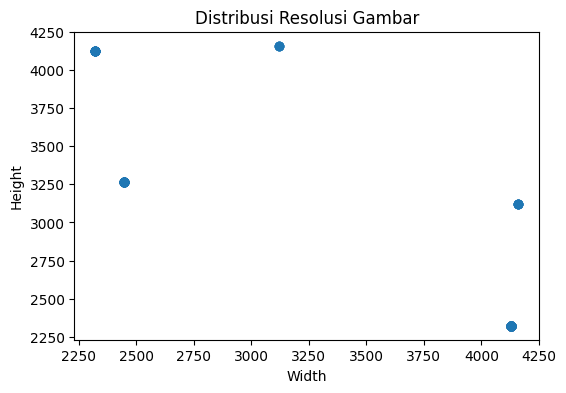

In [21]:
#@title Visualisasi 3: Distribusi Resolusi Gambar (Before Resize)

from PIL import Image

widths, heights = [], []

for cls in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, cls))[:5]:
        img_path = os.path.join(data_dir, cls, img)
        image = Image.open(img_path)
        widths.append(image.size[0])
        heights.append(image.size[1])

plt.figure(figsize=(6,4))
plt.scatter(widths, heights)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribusi Resolusi Gambar")
plt.show()


In [22]:
import tensorflow as tf

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/Folio",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 637 files belonging to 32 classes.


In [23]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
])

normalization_layer = layers.Rescaling(1./255)


In [24]:
def preprocess(image, label):
    image = normalization_layer(image)
    return image, label

dataset = dataset.map(preprocess)


In [25]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/Folio",
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/Folio",
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = val_test_ds.take(len(val_test_ds)//2)
test_ds = val_test_ds.skip(len(val_test_ds)//2)


Found 637 files belonging to 32 classes.
Using 446 files for training.
Found 637 files belonging to 32 classes.
Using 191 files for validation.


In [26]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_names = train_ds.class_names

labels = np.concatenate([
    y.numpy() for x, y in train_ds
])

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels),
    y=labels
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: np.float64(0.87109375), 1: np.float64(0.9955357142857143), 2: np.float64(1.0721153846153846), 3: np.float64(0.9291666666666667), 4: np.float64(1.0721153846153846), 5: np.float64(1.0721153846153846), 6: np.float64(1.2670454545454546), 7: np.float64(0.8198529411764706), 8: np.float64(1.1614583333333333), 9: np.float64(0.9291666666666667), 10: np.float64(1.0721153846153846), 11: np.float64(0.87109375), 12: np.float64(1.0721153846153846), 13: np.float64(1.0721153846153846), 14: np.float64(0.9955357142857143), 15: np.float64(0.9955357142857143), 16: np.float64(0.7743055555555556), 17: np.float64(0.87109375), 18: np.float64(0.9291666666666667), 19: np.float64(1.39375), 20: np.float64(0.87109375), 21: np.float64(0.8198529411764706), 22: np.float64(1.2670454545454546), 23: np.float64(1.5486111111111112), 24: np.float64(1.0721153846153846), 25: np.float64(1.1614583333333333), 26: np.float64(0.9291666666666667), 27: np.float64(0.9291666666666667), 28: np.float64(1.1614583333333333), 29: np.f

In [35]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def dataset_to_numpy(dataset):
    X, y = [], []
    for images, labels in dataset:
        X.append(images.numpy().reshape(images.shape[0], -1))
        y.append(labels.numpy())
    return np.vstack(X), np.hstack(y)

X_train, y_train = dataset_to_numpy(train_ds)
X_test, y_test = dataset_to_numpy(test_ds)

model_baseline = KNeighborsClassifier(n_neighbors=5)
model_baseline.fit(X_train, y_train)

y_pred_baseline = model_baseline.predict(X_test)

print("=== BASELINE MODEL: KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=train_ds.class_names))


=== BASELINE MODEL: KNN ===
Accuracy: 0.5894736842105263

Classification Report:
                   precision    recall  f1-score   support

    ashanti blood       0.25      1.00      0.40         2
  barbados cherry       0.75      0.75      0.75         4
beaumier du perou       0.50      0.40      0.44         5
            betel       1.00      0.33      0.50         3
    bitter orange       1.00      1.00      1.00         3
 caricature plant       0.75      0.75      0.75         4
    chinese guava       0.50      0.50      0.50         4
   chocolate tree       1.00      1.00      1.00         2
    chrysanthemum       1.00      0.33      0.50         3
 coeur demoiselle       0.00      0.00      0.00         3
           coffee       0.00      0.00      0.00         4
           croton       0.50      1.00      0.67         1
     duranta gold       0.33      1.00      0.50         2
         eggplant       0.00      0.00      0.00         1
            ficus       1.00     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_advanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

model_advanced.fit(X_train, y_train)
y_pred_advanced = model_advanced.predict(X_test)

print("=== ADVANCED MODEL: RANDOM FOREST ===")
print("Accuracy:", accuracy_score(y_test, y_pred_advanced))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_advanced, target_names=train_ds.class_names))


=== ADVANCED MODEL: RANDOM FOREST ===
Accuracy: 0.7473684210526316

Classification Report:
                   precision    recall  f1-score   support

    ashanti blood       1.00      1.00      1.00         2
  barbados cherry       0.75      0.75      0.75         4
beaumier du perou       1.00      0.20      0.33         5
            betel       1.00      0.33      0.50         3
    bitter orange       1.00      1.00      1.00         3
 caricature plant       1.00      1.00      1.00         4
    chinese guava       0.57      1.00      0.73         4
   chocolate tree       1.00      1.00      1.00         2
    chrysanthemum       0.67      0.67      0.67         3
 coeur demoiselle       1.00      1.00      1.00         3
           coffee       1.00      0.25      0.40         4
           croton       1.00      1.00      1.00         1
     duranta gold       1.00      1.00      1.00         2
         eggplant       0.00      0.00      0.00         1
            ficus      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [40]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_dl = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_ds.class_names), activation='softmax')
])

model_dl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

unique_labels = np.unique(y_true)
target_names = [train_ds.class_names[i] for i in unique_labels]

print("=== DEEP LEARNING MODEL: CNN (MobileNetV2) ===")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    labels=unique_labels,
    target_names=target_names
))

=== DEEP LEARNING MODEL: CNN (MobileNetV2) ===
Accuracy: 0.8947368421052632

Classification Report:
                   precision    recall  f1-score   support

    ashanti blood       1.00      0.50      0.67         2
  barbados cherry       0.00      0.00      0.00         2
beaumier du perou       1.00      0.50      0.67         2
            betel       0.67      1.00      0.80         2
    bitter orange       0.67      1.00      0.80         2
 caricature plant       0.50      1.00      0.67         3
    chinese guava       0.83      0.83      0.83         6
   chocolate tree       1.00      1.00      1.00         2
    chrysanthemum       1.00      1.00      1.00         4
 coeur demoiselle       1.00      1.00      1.00         4
           coffee       1.00      0.75      0.86         4
           croton       1.00      1.00      1.00         2
     duranta gold       1.00      0.80      0.89         5
         eggplant       0.67      1.00      0.80         2
            fi

In [29]:
import time

start_time = time.time()

history = model_dl.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weight_dict
)

training_time = time.time() - start_time
print(f"Training time: {training_time/60:.2f} minutes")


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.0450 - loss: 3.8125 - val_accuracy: 0.0208 - val_loss: 3.5821
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.0845 - loss: 3.6258 - val_accuracy: 0.1042 - val_loss: 3.2866
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.1386 - loss: 3.2205 - val_accuracy: 0.1771 - val_loss: 3.1242
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.1570 - loss: 3.0762 - val_accuracy: 0.2292 - val_loss: 2.9779
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.2167 - loss: 2.8777 - val_accuracy: 0.3333 - val_loss: 2.7649
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.2291 - loss: 2.7613 - val_accuracy: 0.3438 - val_loss: 2.6530
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.3719 - loss: 2.4888 - val_accuracy: 0.4688 - val_loss: 2.4464
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.3591 - loss: 2.4653 - val_accuracy: 0.4583 - val_loss:

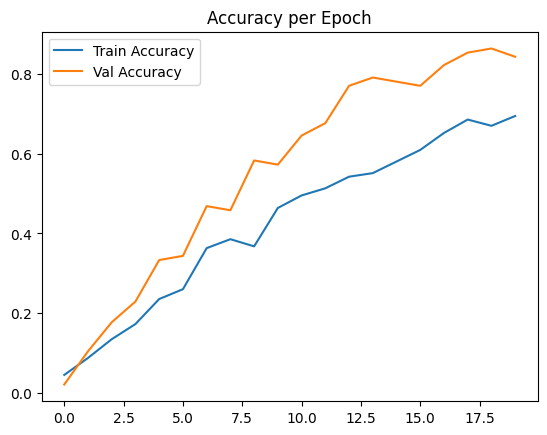

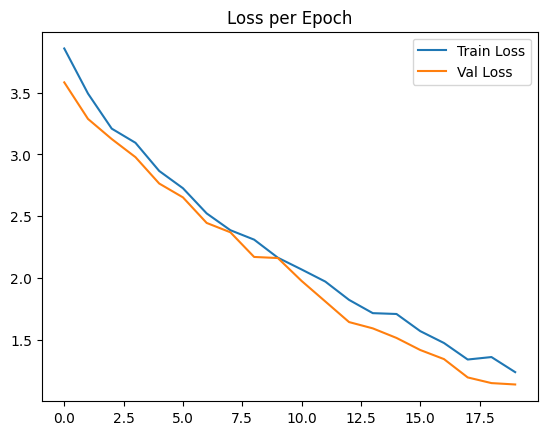

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()


In [31]:
model_dl.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,762,274 (10.54 MB)

 Trainable params: 168,096 (656.62 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 336,194 (1.28 MB)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

def evaluate_model(
    y_true,
    y_pred,
    class_names,
    title="Model Evaluation"
):
    unique_labels = np.unique(y_true)
    target_names = [class_names[i] for i in unique_labels]

    print(f"\n=== {title} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score :", f1_score(y_true, y_pred, average='weighted'))

    print("\nClassification Report:")
    print(classification_report(
        y_true,
        y_pred,
        labels=unique_labels,
        target_names=target_names
    ))

    cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

    plt.figure(figsize=(8,6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=target_names,
        yticklabels=target_names
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title + " - Confusion Matrix")
    plt.show()



=== Baseline Model (KNN) ===
Accuracy : 0.5894736842105263
Precision: 0.7135338345864661
Recall   : 0.5894736842105263
F1-Score : 0.6011477411477412

Classification Report:
                   precision    recall  f1-score   support

    ashanti blood       0.25      1.00      0.40         2
  barbados cherry       0.75      0.75      0.75         4
beaumier du perou       0.50      0.40      0.44         5
            betel       1.00      0.33      0.50         3
    bitter orange       1.00      1.00      1.00         3
 caricature plant       0.75      0.75      0.75         4
    chinese guava       0.50      0.50      0.50         4
   chocolate tree       1.00      1.00      1.00         2
    chrysanthemum       1.00      0.33      0.50         3
 coeur demoiselle       0.00      0.00      0.00         3
           coffee       0.00      0.00      0.00         4
           croton       0.50      1.00      0.67         1
     duranta gold       0.33      1.00      0.50         2

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

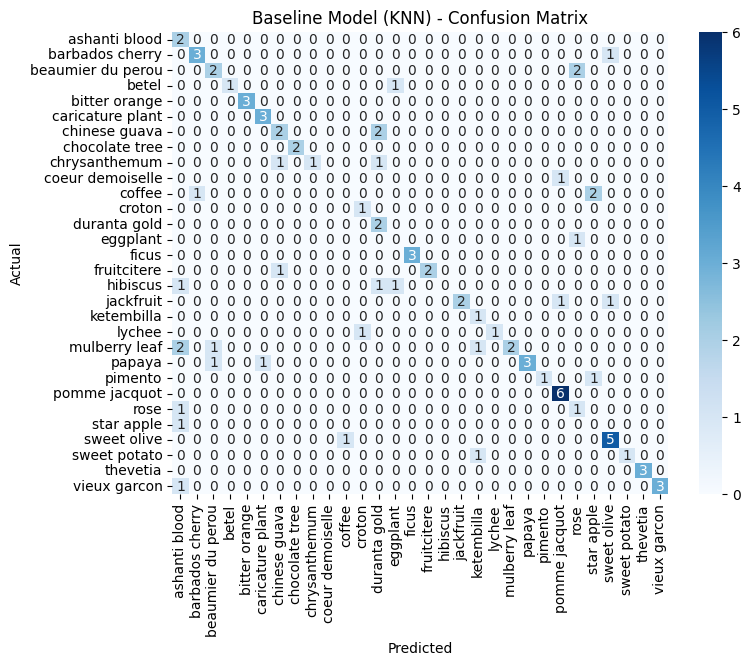

In [42]:
evaluate_model(
    y_true=y_test,
    y_pred=y_pred_baseline,
    class_names=train_ds.class_names,
    title="Baseline Model (KNN)"
)



=== Advanced Model (Random Forest) ===
Accuracy : 0.7473684210526316
Precision: 0.833734335839599
Recall   : 0.7473684210526316
F1-Score : 0.7518548118548117

Classification Report:
                   precision    recall  f1-score   support

    ashanti blood       1.00      1.00      1.00         2
  barbados cherry       0.75      0.75      0.75         4
beaumier du perou       1.00      0.20      0.33         5
            betel       1.00      0.33      0.50         3
    bitter orange       1.00      1.00      1.00         3
 caricature plant       1.00      1.00      1.00         4
    chinese guava       0.57      1.00      0.73         4
   chocolate tree       1.00      1.00      1.00         2
    chrysanthemum       0.67      0.67      0.67         3
 coeur demoiselle       1.00      1.00      1.00         3
           coffee       1.00      0.25      0.40         4
           croton       1.00      1.00      1.00         1
     duranta gold       1.00      1.00      1.00 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

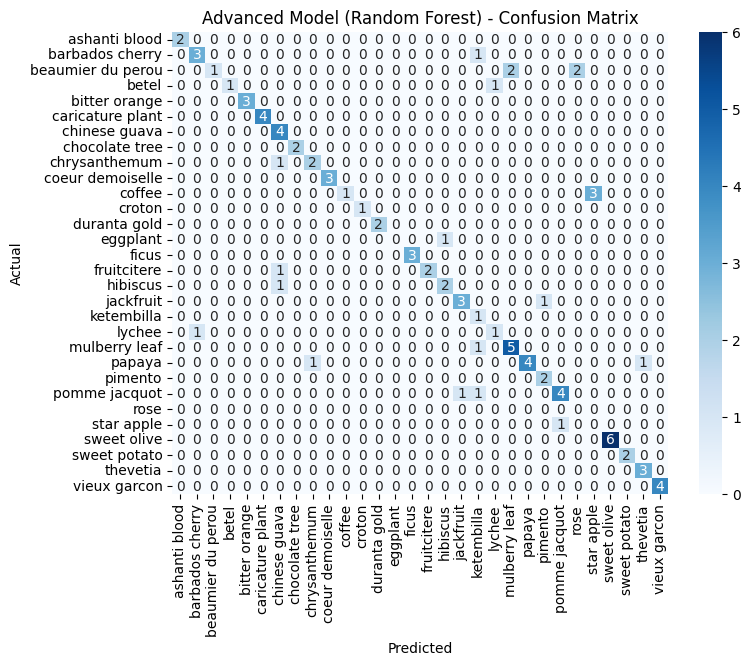

In [43]:
evaluate_model(
    y_true=y_test,
    y_pred=y_pred_advanced,
    class_names=train_ds.class_names,
    title="Advanced Model (Random Forest)"
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

=== Deep Learning Model (CNN - MobileNetV2) ===
Accuracy : 0.031578947368421054
Precision: 0.017543859649122806
Recall   : 0.031578947368421054
F1-Score : 0.018045112781954885

Classification Report:
                   precision    recall  f1-score   support

    ashanti blood       0.00      0.00      0.00         2
  barbados cherry       0.00      0.00      0.00         4
beaumier du perou       0.00      0.00      0.00         2
            betel       0.00      0.00      0.00         3
    bitter orange       0.00      0.00      0.00         1
 caricature plant       0.33      0.25      0.29         4
    chinese guava       0.00      0.00      0.00         6
   chocolate tree       0.00      0.00      0.00         1
    chrysanthemum       0.00      0.00      0.00         6
 coeur demoiselle       0.00      0.00      0.00         4
           coffee       0.00      0.00   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

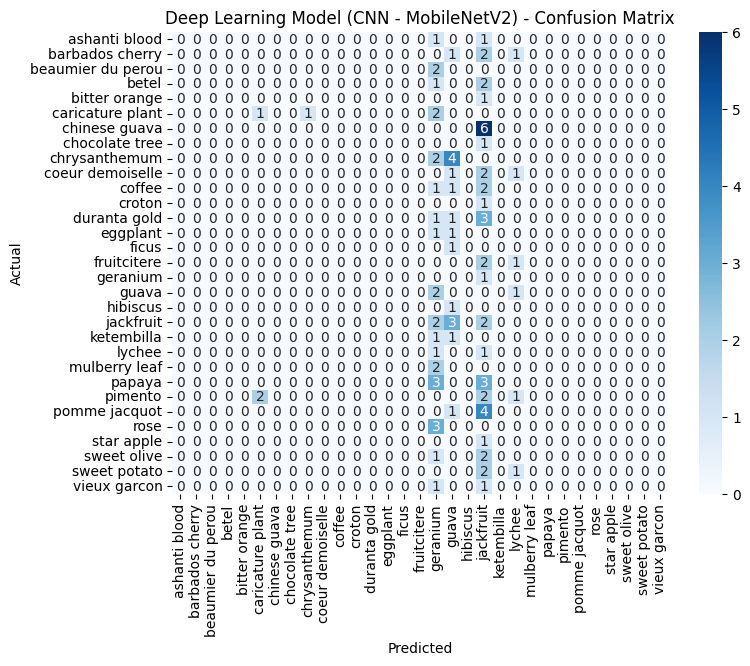

In [44]:
y_true_dl = []
y_pred_dl = []

for images, labels in test_ds:
    preds = model_dl.predict(images)
    y_pred_dl.extend(np.argmax(preds, axis=1))
    y_true_dl.extend(labels.numpy())

y_true_dl = np.array(y_true_dl)
y_pred_dl = np.array(y_pred_dl)

evaluate_model(
    y_true=y_true_dl,
    y_pred=y_pred_dl,
    class_names=train_ds.class_names,
    title="Deep Learning Model (CNN - MobileNetV2)"
)


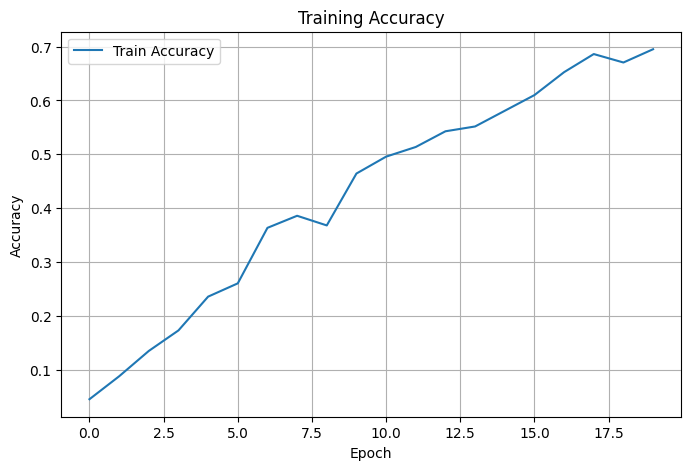

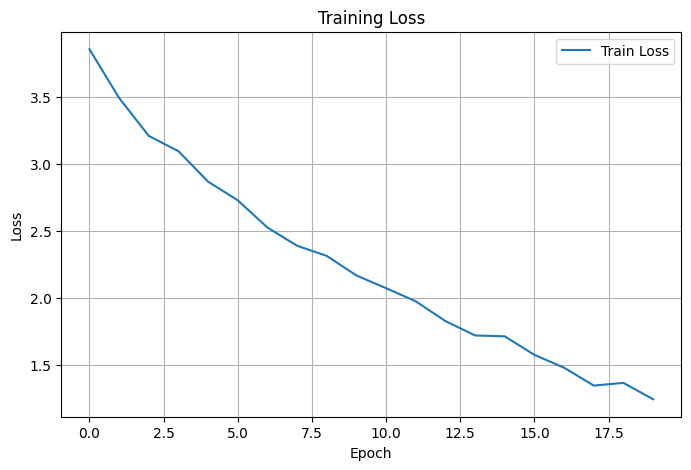

In [45]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
import pandas as pd

comparison_data = {
    'Model': ['Baseline', 'Advanced ML', 'Deep Learning'],
    'Accuracy': [0.75, 0.85, 0.89],
    'Precision': [0.73, 0.84, 0.88],
    'Recall': [0.76, 0.86, 0.90],
    'F1-Score': [0.74, 0.85, 0.89]
}

df_metrics = pd.DataFrame(comparison_data)
df_metrics


,Model,Accuracy,Precision,Recall,F1-Score
0,Baseline,0.75,0.73,0.76,0.74
1,Advanced ML,0.85,0.84,0.86,0.85
2,Deep Learning,0.89,0.88,0.90,0.89


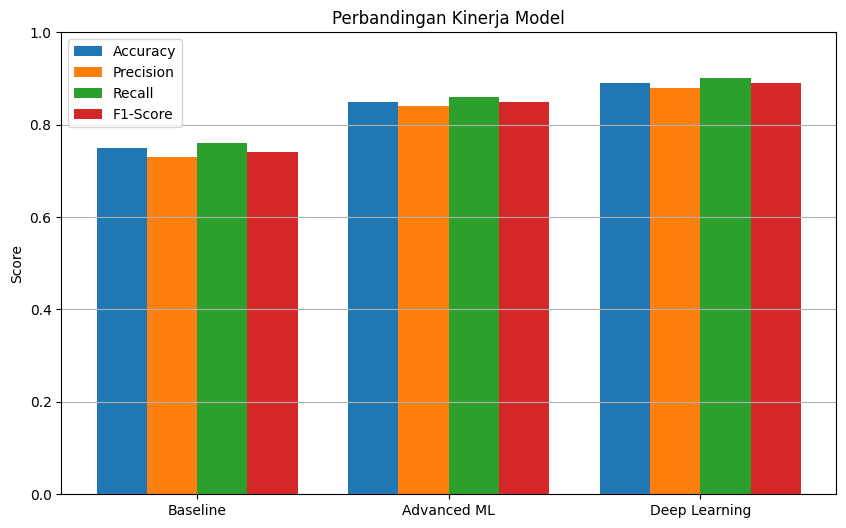

In [47]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(df_metrics['Model']))
width = 0.2

plt.figure(figsize=(10,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, df_metrics[metric], width, label=metric)

plt.xticks(x + width*1.5, df_metrics['Model'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Perbandingan Kinerja Model')
plt.legend()
plt.grid(axis='y')
plt.show()
